# Imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import math
import unicodedata

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

# Graphs

## Half-life

In [2]:
N0        = 6e+23
dec_const = 3.8394e-12

In [3]:
def exp_decay(N0:float, dec_const: float, t: int) -> float:
    return N0 * math.exp(-1 * dec_const * t)

def half_life(dec_const: float) -> float:
    return math.log(2) / dec_const

In [31]:
# t_half = exp_decay(N0, dec_const, 5730 * 365.25 * 24 * 3600)
t_half_sec = half_life(dec_const)
t_half_yrs = t_half_sec / 3600 / 24 / 365.25
t_half_mil = t_half_yrs / 1000


print(t_half_sec)
print(t_half_yrs)
print(t_half_mil)
exp_decay(N0, dec_const, t_half_sec)

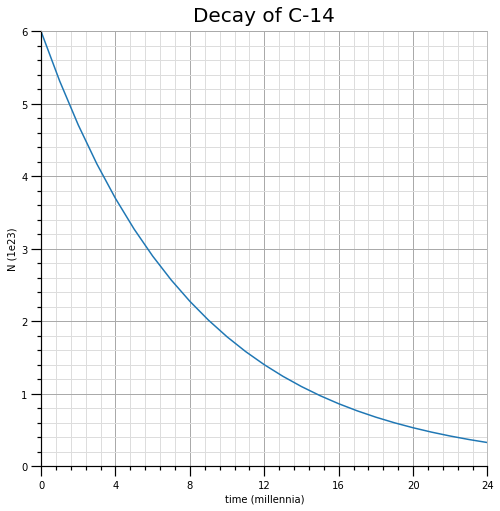

In [5]:
# setup the plot, add a figure and a set of axis
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)

# limits and spines
ax.set_xlim(0,24e+3)
ax.set_ylim(0,6e+23)
ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x  / 1000)}"


def major_y_tick(y, pos):
    if math.isclose(6e+23, y):
        return "6"
    else:
        return f"{int(y  / 1e+23)}"


ax.xaxis.set_major_locator(MultipleLocator(4000))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1e+23))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")

ax.set_title("Decay of C-14", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("time (millennia)")
ax.set_ylabel("N (1e23)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals)
plt.savefig("./images/c-14_decay.png", facecolor="#ffffff")

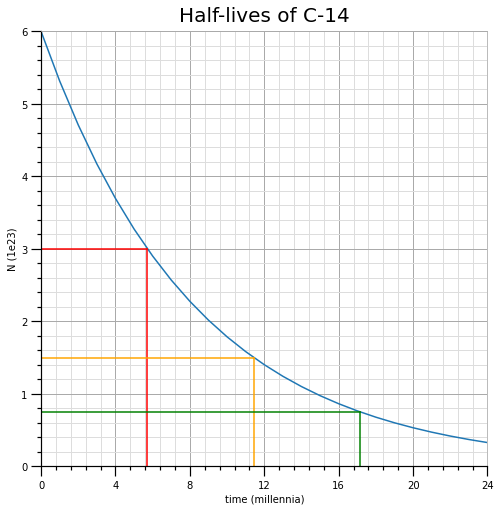

In [33]:
# setup the plot, add a figure and a set of axis
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
ax = f.add_subplot(1,1,1)

# limits and spines
ax.set_xlim(0,24e+3)
ax.set_ylim(0,6e+23)
ax.spines['top'].set_color("#aaaaaa")
ax.spines['right'].set_color("#aaaaaa")
ax.spines['left'].set(linewidth=1.2)
ax.spines['bottom'].set(linewidth=1.2)


# tick marks
def minor_x_tick(x, pos):
    return f""


def minor_y_tick(y, pos):
    return f""


def major_x_tick(x, pos):
    return f"{int(x  / 1000)}"


def major_y_tick(y, pos):
    if math.isclose(6e+23, y):
        return "6"
    else:
        return f"{int(y  / 1e+23)}"


ax.xaxis.set_major_locator(MultipleLocator(4000))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1e+23))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_formatter(minor_x_tick)
ax.xaxis.set_major_formatter(major_x_tick)
ax.yaxis.set_minor_formatter(minor_y_tick)
ax.yaxis.set_major_formatter(major_y_tick)

ax.tick_params(which='minor', width=1.2, length=4, color="#000000")
ax.tick_params(which='major', width=1.2, length=10, color="#000000")
ax.grid(which="major", linewidth=1, color='#aaaaaa', linestyle="-")
ax.grid(which="minor", linewidth=1, color='#dddddd', linestyle="-")

ax.set_title("Half-lives of C-14", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("time (millennia)")
ax.set_ylabel("N (1e23)")

t_vals = np.arange(25) * 1000
N_vals = [exp_decay(N0, dec_const, i * 365.25 * 24 * 3600) for i in t_vals]
ax.plot(t_vals, N_vals)
ax.plot([0, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), exp_decay(N0, dec_const, t_half_sec)], color="red")
ax.plot([t_half_yrs, t_half_yrs], [exp_decay(N0, dec_const, t_half_sec), 0], color="red")
ax.plot([0, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, exp_decay(N0, dec_const, t_half_sec) / 2], color="orange")
ax.plot([t_half_yrs * 2, t_half_yrs * 2], [exp_decay(N0, dec_const, t_half_sec) / 2, 0], color="orange")

ax.plot([0, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, exp_decay(N0, dec_const, t_half_sec) / 4], color="green")
ax.plot([t_half_yrs * 3, t_half_yrs * 3], [exp_decay(N0, dec_const, t_half_sec) / 4, 0], color="green")
plt.savefig("./images/c-14_t_half.png", facecolor="#ffffff")
